(Chap_BasicEmpirMethods)=
# Basic Empirical Methods

This chapter has an executable [Google Colab notebook](https://colab.research.google.com/drive/1sIHaDBE5fafPXYBl9cRDFQMsFNjq67t5?usp=sharing) with all the same code, data references, and images. The Google Colab notebook allows you to execute the code in this chapter in the cloud so you don't have to download Python, any of its packages, or any data to your local computer. You could manipulate and execute this notebook on any device with a browser, whether than be your computer, phone, or tablet.

The focus of this chapter is to give the reader a basic introduction to the standard empirical methods in data science, policy analysis, and economics. I want each reader to come away from this chapter with the following basic skills:

* Difference between **correlation** and **causation**
* Standard **data description**
* Basic understanding of **linear regression**
    * What do regression **coefficients** mean?
    * What do **standard errors** mean?
    * How can I estimate my own linear regression with standard errors?
    * Basic extensions: cross terms, quadratic terms, difference-in-difference
* Ideas behind bigger extensions of linear regression
    * Instrumental variables (omitted variable bias)
    * Logistic regression
    * Multiple equation models
    * Panel data
    * Time series data
    * Vector autoregression


In the next chapter {ref}`Chap_BasicMLintro`, I give a more detailed treatment of logistic regression as a bridge to learning the basics of machine learning.

Some other good resources on the topic of learning the basics of linear regression in Python include the [QuantEcon.org](https://quantecon.org/) lectures "[Simple Linear Regression Model](https://intro.quantecon.org/simple_linear_regression.html)" {cite}`SargentStachurski:2023a`, and "[Linear Regression in Python](https://python.quantecon.org/ols.html)" {cite}`SargentStachurski:2023b`.


(SecBasicEmpLit)=
## Basic Empirical Methods in the Literature

What are the standard empirical methods in the current version of the *American Economic Review* ([Vol. 113, No. 10, October 2023](https://www.aeaweb.org/issues/736))?

Allen, Bertazzini, and Heldring, "The Economic Origins of Government" {cite}`AllenEtAl:2023`
* Table 1, descriptive/summary statistics of the data
* Eq. 1: Difference-in-difference
\begin{equation*}
  Y_{c,t} = \sum_{k=0}^{-4}\left(\beta_k^{trmt}\times\mathbf{1}_k\times treated_c\right) + \rho_c + \gamma_t + \nu_{c,t} + \varepsilon_{c,t}
\end{equation*}
* Table 2, estimated coefficients, cross terms, standard errors

The iframe below contains a PDF of {cite}`AllenEtAl:2023` "The Economic Origins of Government".

<div>
  <iframe id="inlineFrameExample"
      title="Inline Frame Example"
      width="100%"
      height="700"
      src="https://drive.google.com/file/d/1ZR8a6DmbMbrW3K4Hdkgg5x4X1oFy_yNn/preview?usp=sharing">
  </iframe>
</div>


(SecBasicEmpCorrCaus)=
## Correlation versus Causation

```{figure} ../../../images/basic_empirics/basic_empirics/CorrVsCaus.png
:height: 500px
:name: FigBasicEmpir_CorrVsCaus

Correlation versus causation comic by {cite}`Elliott:2023`.
```

What is the difference between correlation and causation?
* What are some examples of things that are correlated but do not "cause" each other?

What are some principles that cause correlation to not be causation?
* Third variable problem/omitted variable/spurious correlation
* Directionality/endogeneity

How do we determine causation?
* Randomized controlled trials (RCT)
* Laboratory experiments
* Natural experiments
* Quasi natural experiments


(SecBasicEmpDescr)=
## Data Description

Any paper that uses data needs to spend some ink summarizing and describing the data. This is usually done in tables. But it can also be done in cross tabulation, which is descriptive statistics by category. The most common types of descriptive statistics are the following:

* mean
* median
* variance
* count
* max
* min

Let's download some data, and read it in using the Pandas library for Python.[^PandasRef] The following example is adapted from QuantEcon's "[Linear Regression in Python](https://python.quantecon.org/ols.html)" lecture {cite}`SargentStachurski:2023b`.

The research question of the paper "The Colonial Origins of Comparative Development: An Empirical Investigation" {cite}`AcemogluEtAl:2001` is to determine whether or not differences in institutions can help to explain observed economic outcomes. How do we measure institutional differences and economic outcomes? In this paper:
* economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates,
* institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the [Political Risk Serivces Group](https://www.prsgroup.com/).

These variables and other data used in the paper are available for download on [Daron Acemoglu’s webpage](https://economics.mit.edu/faculty/acemoglu/data/ajr2001).


(SecBasicEmpDescrBasic)=
### Basic data description

The following cells downloads the data from {cite}`AcemogluEtAl:2001` from the file `maketable1.dta` and displays the first five observations from the data.

In [1]:
import pandas as pd

path_df1 = ('https://github.com/OpenSourceEcon/CompMethods/' +
            'raw/main/data/basic_empirics/maketable1.dta')
df1 = pd.read_stata(path_df1)

The [`pandas.DataFrame.head`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method returns the first $n$ forws of a DataFrame with column headings and index numbers. The default is `n=5`.

In [2]:
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


How many observations are in this dataset? What are the different countries in this dataset? The [`pandas.DataFrame.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) method returns a tuple in which the first element is the number of observations (rows) in the DataFrame and the second element is the number of variables (columns).

In [3]:

df1.shape

(163, 13)

In [4]:
print("The number of observations (rows) and variables (columns)")
print("in the dataset is " + str(df1.shape[0]) + "observations (rows) and")
print(str(df1.shape[1]) + " variables (columns).")
print("")
print("A list of all the", len(df1["shortnam"].unique()),
      'unique countries in the "shortnam" variable is:')
print("")
print(df1["shortnam"].unique())

The number of observations (rows) and variables (columns)
in the dataset is 163observations (rows) and
13 variables (columns).

A list of all the 163 unique countries in the "shortnam" variable is:

['AFG' 'AGO' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'AZE' 'BDI' 'BEL' 'BEN' 'BFA'
 'BGD' 'BGR' 'BHR' 'BHS' 'BIH' 'BLR' 'BLZ' 'BOL' 'BRA' 'BRB' 'BTN' 'BWA'
 'CAF' 'CAN' 'CHE' 'CHL' 'CHN' 'CIV' 'CMR' 'COG' 'COL' 'COM' 'CPV' 'CRI'
 'CZE' 'DEU' 'DJI' 'DNK' 'DOM' 'DZA' 'ECU' 'EGY' 'ERI' 'ESP' 'EST' 'ETH'
 'FIN' 'FJI' 'FRA' 'GAB' 'GBR' 'GEO' 'GHA' 'GIN' 'GMB' 'GNB' 'GRC' 'GTM'
 'GUY' 'HKG' 'HND' 'HRV' 'HTI' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'KAZ' 'KEN' 'KGZ' 'KOR' 'KWT' 'LAO' 'LBR'
 'LBY' 'LKA' 'LSO' 'LTU' 'LUX' 'LVA' 'MAR' 'MDA' 'MDG' 'MEX' 'MKD' 'MLI'
 'MLT' 'MMR' 'MNG' 'MOZ' 'MRT' 'MUS' 'MWI' 'MYS' 'NAM' 'NER' 'NGA' 'NIC'
 'NLD' 'NOR' 'NPL' 'NZL' 'OMN' 'PAK' 'PAN' 'PER' 'PHL' 'PNG' 'POL' 'PRK'
 'PRT' 'PRY' 'QAT' 'ROM' 'RUS' 'RWA' 'SAU' 'SDN' 'SEN' 'SGP' 'SLE' 'SLV

Pandas DataFrames have a built-in method [`.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) that will give the basic descriptive statistics for the numerical variables of a dataset.

In [5]:
df1.describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
count,154.000000,162.000000,121.000000,148.000000,88.000000,88.000000,87.000000,91.000000,87.000000,87.000000,123.000000,64.0
mean,30.466232,0.666667,7.066491,8.302509,3.590909,3.636364,1.149425,1.857143,220.926437,4.595984,-1.731106,1.0
std,42.389862,0.472866,1.804287,1.105342,2.414689,2.339967,2.576859,1.823132,411.498230,1.303334,1.083726,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0
25%,0.000000,0.000000,5.886364,7.376192,1.000000,1.750000,0.000000,1.000000,68.350006,4.224609,-2.741120,1.0
50%,1.950000,1.000000,7.045455,8.265764,3.000000,3.000000,0.000000,1.000000,85.000000,4.442651,-1.560648,1.0
75%,91.625000,1.000000,8.272727,9.216228,7.000000,7.000000,1.000000,1.000000,253.259995,5.610119,-0.831277,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,0.000000,1.0


The variable `logpgp95` represents GDP per capita for each country. The variable `avexpr` represents the protection against expropriation index. So more protection is a good thing. What do we expect to see if we do a scatterplot of these two variables with `avexpr` on the `x`-axis and `logpgp95` on the `y`-axis? Draw it on a piece of paper or on a white board.

Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index.

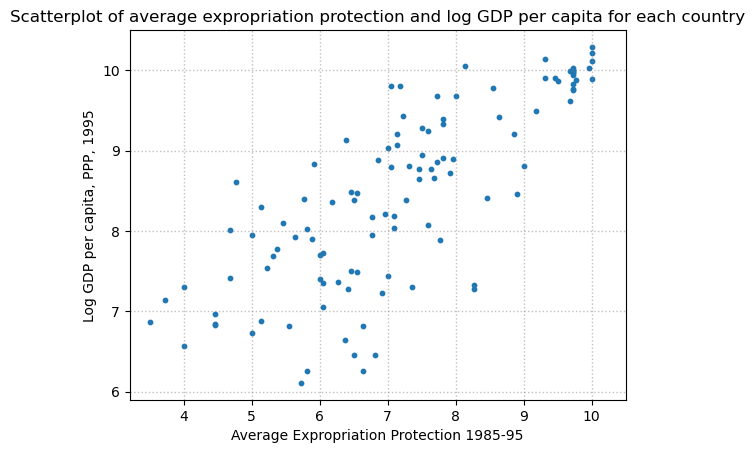

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=df1["avexpr"], y=df1["logpgp95"], s=10)
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.title("Scatterplot of average expropriation protection and log GDP per " +
          "capita for each country")
plt.xlabel(r'Average Expropriation Protection 1985-95')
plt.ylabel(r'Log GDP per capita, PPP, 1995')
plt.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.show()

```{figure} ../../../images/basic_empirics/basic_empirics/scatter1.png
:height: 500px
:name: FigBasicEmpir_scatter1

Scatterplot of average expropriation protection $avexpr$ and log GDP per capita $logpgp95$ for each country
```

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita. Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita).


(SecBasicEmpDescrCross)=
### Cross tabulated data Description

Cross tabulation is a set of descriptive statics by groupings of the data. In R and Python, this is done with a powerful [`.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) command. What if we thought that the relationship between protection against expropriation `avexpr` and `logpgp95` were different for countries whose abbreviation started with A-M versus countries whose abbreviation started with N-Z?

In [7]:
# Create AtoM variable that = 1 if the first letter of the abbreviation is in
# A to M and = 0 if it is in N to Z
df1["AtoM"] = 0
df1["AtoM"][
    df1["shortnam"].str[0].isin([
        'A','B','C','D','E','F','G','H','I','J','K','L','M'
    ])
] = 1

# Describe the data
df1.groupby("AtoM").describe()

/tmp/ipykernel_2868/3993614049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["AtoM"][


euro1900                                                   excolony  \
        count       mean        std  min  25%  50%   75%    max    count   
AtoM                                                                       
0        55.0  28.449091  40.994987  0.0  0.0  1.0  50.0  100.0     58.0   
1        99.0  31.586870  43.310207  0.0  0.0  2.0  99.5  100.0    104.0   

                ...  loghjypl           baseco                                \
          mean  ...       75%       max  count mean  std  min  25%  50%  75%   
AtoM            ...                                                            
0     0.689655  ... -0.870507  0.000000   24.0  1.0  0.0  1.0  1.0  1.0  1.0   
1     0.653846  ... -0.763590 -0.014099   40.0  1.0  0.0  1.0  1.0  1.0  1.0   

           
      max  
AtoM       
0     1.0  
1     1.0  

[2 rows x 96 columns]

Another way we could do this that is more readable that the output above is to just describe the data in two separate commands in which we restrict the data to the two separate groups.

In [8]:
df1[df1["AtoM"]==1].describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco,AtoM
count,99.000000,104.000000,74.000000,95.000000,55.000000,55.000000,55.000000,57.000000,58.000000,58.000000,75.000000,40.0,104.0
mean,31.586870,0.653846,7.204545,8.381995,3.672727,3.654546,1.236364,2.000000,220.015854,4.534877,-1.701214,1.0,1.0
std,43.310207,0.478047,1.854914,1.104331,2.373110,2.374386,2.624413,1.982062,431.900574,1.347500,1.119577,0.0,0.0
min,0.000000,0.000000,1.636364,6.109248,1.000000,1.000000,0.000000,1.000000,2.550000,0.936093,-3.540459,1.0,1.0
25%,0.000000,0.000000,6.045455,7.417576,1.000000,2.000000,0.000000,1.000000,68.075005,4.220586,-2.789016,1.0,1.0
50%,2.000000,1.000000,7.204545,8.301521,3.000000,3.000000,0.000000,1.000000,81.599998,4.400960,-1.560648,1.0,1.0
75%,99.500000,1.000000,8.613637,9.366871,7.000000,6.500000,1.000000,1.000000,259.889984,5.559247,-0.763590,1.0,1.0
max,100.000000,1.000000,10.000000,10.288750,7.000000,7.000000,10.000000,7.000000,2940.000000,7.986165,-0.014099,1.0,1.0


In [9]:
df1[df1["AtoM"]==0].describe()

,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco,AtoM
count,55.000000,58.000000,47.000000,53.000000,33.000000,33.000000,32.000000,34.000000,29.000000,29.000000,48.000000,24.0,59.0
mean,28.449091,0.689655,6.849130,8.160035,3.454545,3.606061,1.000000,1.617647,222.747574,4.718197,-1.777811,1.0,0.0
std,40.994987,0.466675,1.718516,1.103215,2.513599,2.317588,2.527271,1.517867,374.625153,1.223847,1.035098,0.0,0.0
min,0.000000,0.000000,3.000000,6.253829,1.000000,1.000000,0.000000,1.000000,8.550000,2.145931,-3.540459,1.0,0.0
25%,0.000000,0.000000,5.818182,7.279319,1.000000,1.000000,0.000000,1.000000,71.000000,4.262680,-2.710639,1.0,0.0
50%,1.000000,1.000000,6.863636,8.107720,3.000000,3.000000,0.000000,1.000000,140.000000,4.941642,-1.595533,1.0,0.0
75%,50.000000,1.000000,7.659091,8.885994,7.000000,7.000000,1.000000,1.000000,240.000000,5.634789,-0.870507,1.0,0.0
max,100.000000,1.000000,10.000000,10.215740,7.000000,7.000000,10.000000,7.000000,2004.000000,7.602901,0.000000,1.0,0.0


Let's make two scatterplots to see with our eyes if there seems to be a difference in the relationship.

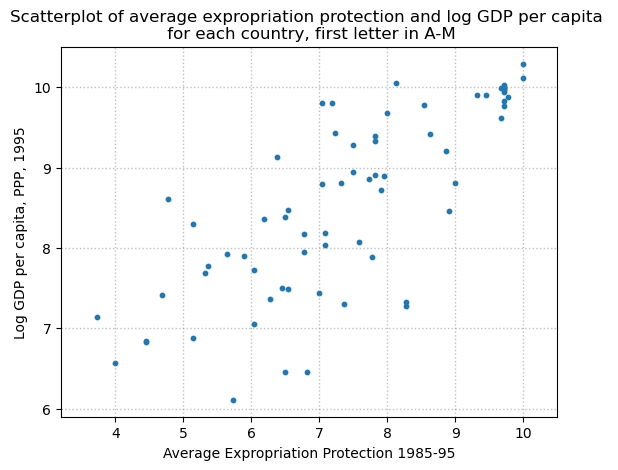

In [10]:
# Plot the scatterplot of the relationship for the countries for which the first
# letter of the abbreviation is between A to M
plt.scatter(
  x=df1[df1["AtoM"]==1]["avexpr"], y=df1[df1["AtoM"]==1]["logpgp95"], s=10
)
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.title("Scatterplot of average expropriation protection and log GDP per " +
          "capita \n for each country, first letter in A-M")
plt.xlabel(r'Average Expropriation Protection 1985-95')
plt.ylabel(r'Log GDP per capita, PPP, 1995')
plt.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.show()

```{figure} ../../../images/basic_empirics/basic_empirics/scatter2.png
:height: 500px
:name: FigBasicEmpir_scatter2

Scatterplot of average expropriation protection $avexpr$ and log GDP per capita $logpgp95$ for each country, first letter in A-M
```

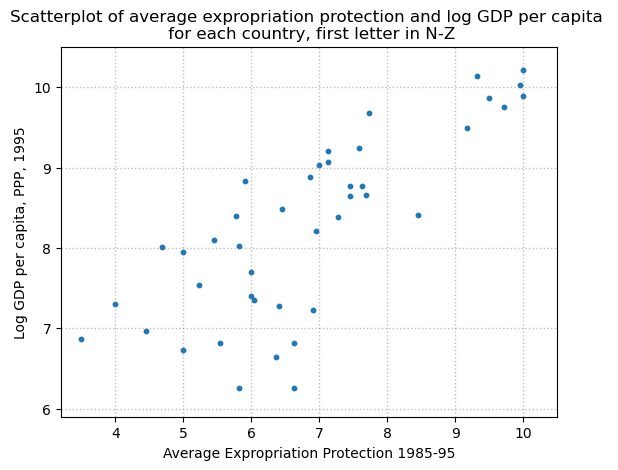

In [11]:
# Plot the scatterplot of the relationship for the countries for which the first
# letter of the abbreviation is between N to Z
plt.scatter(
  x=df1[df1["AtoM"]==0]["avexpr"], y=df1[df1["AtoM"]==0]["logpgp95"], s=10
)
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.title("Scatterplot of average expropriation protection and log GDP per " +
          "capita \n for each country, first letter in N-Z")
plt.xlabel(r'Average Expropriation Protection 1985-95')
plt.ylabel(r'Log GDP per capita, PPP, 1995')
plt.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
plt.show()

```{figure} ../../../images/basic_empirics/basic_empirics/scatter3.png
:height: 500px
:name: FigBasicEmpir_scatter3

Scatterplot of average expropriation protection $avexpr$ and log GDP per capita $logpgp95$ for each country, first letter in N-Z
```


(SecBasicEmpLinReg)=
## Basic Understanding of Linear Regression


(SecBasicEmpLinRegExamp)=
### Example: Acemoglu, et al (2001)

Given the plots in {numref}`Figure %s <FigBasicEmpir_scatter1>`, {numref}`Figure %s <FigBasicEmpir_scatter2>`, and {numref}`Figure %s <FigBasicEmpir_scatter3>` above, choosing a linear model to describe this relationship seems like a reasonable assumption.

We can write a model as:

```{math}
    :label: EqBasicEmp_AcemogluReg
    logpgp95_i = \beta_0 + \beta_1 avexpr_i + u_i
```

where:
* $\beta_0$ is the intercept of the linear trend line on the $y$-axis
* $\beta_1$ is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
* $u_i$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

Visually, this linear model involves choosing a straight line that best fits the data according to some criterion, as in the following plot (Figure 2 in {cite}`AcemogluEtAl:2001`).

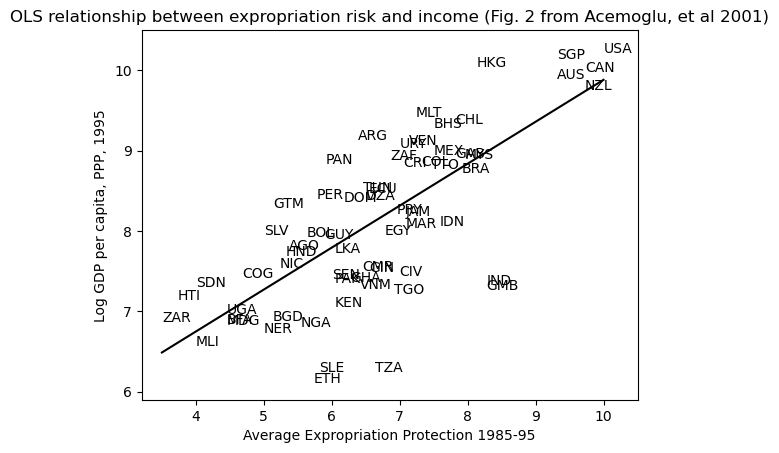

In [12]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])
# df1_subset.describe()

# Use only 'base sample' for plotting purposes (smaller sample)
df1_subset = df1_subset[df1_subset['baseco'] == 1]
# df1_subset.describe()

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlabel('Average Expropriation Protection 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.xlim((3.2, 10.5))
plt.ylim((5.9, 10.5))
plt.title('OLS relationship between expropriation risk and income (Fig. 2 from Acemoglu, et al 2001)')
plt.show()

```{figure} ../../../images/basic_empirics/basic_empirics/AcemogluEtAl_fig2.png
:height: 500px
:name: FigBasicEmpir_AcemFig2

OLS relationship between expropropriation risk and income (Fig. 2 from Acemoglu, et al, 2001)
```

The most common technique to estimate the parameters ($\beta$‘s) of the linear model is Ordinary Least Squares (OLS). As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals.

```{math}
    :label: EqBasicEmp_OLScrit
    \hat{\beta}_{OLS} = \beta : \quad \min_{\beta}\: u(X|\beta_0,\beta_1)^T \: u(X|\beta_0,\beta_1)
```

where $\hat{u}_i$ is the difference between the dependent variable observation $logpgp95_i$ and the predicted value of the dependent variable $\beta_0 + \beta_1 avexpr_i$. To estimate the constant term $\beta_0$, we need to add a column of 1’s to our dataset (consider the equation if $\beta_0$ was replaced with $\beta_0 x_i$ where $x_i=1$).

In [13]:
df1['const'] = 1

Now we can construct our model using the [`statsmodels`](https://www.statsmodels.org/stable/index.html) module and the [`OLS`](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html) method. We will use `pandas` DataFrames with `statsmodels`. However, standard arrays can also be used as arguments.

In [14]:
!pip install --upgrade statsmodels

     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/10.1 MB 74.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 7.3/10.1 MB 126.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 86.9 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 51.7 MB/s eta 0:00:00


In [15]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

So far we have simply constructed our model. The `statsmodels.regression.linear_model.OLS` is simply an object specifying dependent and independent variables, as well as instructions about what to do with missing data. We need to use the `.fit()` method to obtain OLS parameter estimates $\hat{\beta}_0$ and $\hat{\beta}_1$. This method calculates the OLS coefficients according to the minimization problem in {eq}`EqBasicEmp_OLScrit`.

In [16]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

We now have the fitted regression model stored in `results` (see [statsmodels.regression.linear_model.RegressionResultsWrapper](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)). The `results` from the `reg1.fit()` command is a regression results object with a lot of information, similar to the results object of the `scipy.optimize.minimize()` function we worked with in the {ref}`Chap_MLE` and {ref}`Chap_GMM` chapters.

To view the OLS regression results, we can call the `.summary()` method.

[Note that an observation was mistakenly dropped from the results in the original paper (see the note located in maketable2.do from Acemoglu’s webpage), and thus the coefficients differ slightly.]

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.16e-24
Time:                        23:27:55   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

We can get individual items from the results, which are saved as attributes.

In [18]:
print(dir(results))
print("")
print("Degrees of freedom residuals:", results.df_resid)
print("")
print("Estimated coefficients:")
print(results.params)
print("")
print("Standard errors of estimated coefficients:")
print(results.bse)

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_get_wald_nonlinear', '_is_nested', '_transform_predict_exog', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initiali

The powerful machine learning python package scikit-learn also has a linear regression function [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). It is very good at prediction, but it is harder to get things like standard errors that are valuable for inference.


(SecBasicEmpLinRegCoefSE)=
### What do coefficients and standard errors mean?

Go through cross terms and quadratic terms and difference-in-difference.


(SecBasicEmpLinRegInterpRes)=
### Interpreting results and output

From our results, we see that:
* the intercept $\hat{\beta}_0=4.63$ (interpretation?)
* the slope $\hat{\beta}_1=0.53$ (interpretation?)
* the positive $\hat{\beta}_1>0$ parameter estimate implies that protection from expropriation has a positive effect on economic outcomes, as we saw in the figure.
* How would you quantitatively interpret the $\hat{\beta}_1$ coefficient?
* What do the standard errors on the coefficients tell you?
* The p-value of 0.000 for $\hat{\beta}_1$ implies that the effect of institutions on GDP is statistically significant (using $p < 0.05$ as a rejection rule)
* The R-squared value of 0.611 indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation

Using our parameter estimates, we can now write our estimated relationship as:
```{math}
    :label: EqBasicEmp_AcemogluRegEst
    \hat{logpgp95}_i = 4.63 + 0.53 avexpr_i
```

This equation describes the line that best fits our data, as shown in {numref}`Figure %s <FigBasicEmpir_AcemFig2>`. We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection (see Section {ref}`SecBasicEmpLinRegPredVals` below).


(SecBasicEmpLinRegANOVA)=
### Analysis of variance (ANOVA) output

The results `.summary()` method provides a lot of regression output. And the `.RegressionResults` object has much more as evidenced in the help page [statsmodels.regression.linear_model.RegressionResults](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html).

* The `Df Residuals: 109` displays the degrees of freedom from the residual variance calculation. This equals the number of observations minus the number of regression coefficients, `N-p=111-2`. This is accessed with `results.df_resid`.
* The `Df Model: 1` displays the degrees of freedom from the model variance calculation or from the regressors. This equals the number of regression coefficients minus one, `p-1=2-1`. This is accessed with `results.df_model`.
* One can specify robust standard errors in their regression. The robust option is specified in the `.fit()` command. You can specify three different types of robust standard errors using the `.fit(cov_type='HC1')`, `.fit(cov_type='HC2')`, or `.fit(cov_type='HC3')` options.
* You can do clustered standard errors if you have groups labeled in a variable called `mygroups` by using the `.fit(cov_type='cluster', cov_kwds={'groups': mygroups})`.
* R-squared is a measure of fit of the overall model. It is $R^2=1 - SSR/SST$ where $SST$ is the total variance of the dependent variable (total sum of squares), and $SSR$ is the sum of squared residuals (variance of the residuals). Another expresion is the sum of squared predicted values over the total sum of squares $R^2= SSM/SST$, where $SSM$ is the sum of squared predicted values. This is accessed with `results.rsquared`.
* Adjusted R-squared is a measure of fit of the overall model that penalizes extra regressors. A property of the R-squared in the previous bullet is that it always increases as you add more explanatory variables. This is accessed with `results.rsquared_adj`.


(SecBasicEmpLinRegFtest)=
### F-test and log likelihood test

* The F-statistic is the statistic from an F-test of the joint hypothesis that all the coefficients are equal to zero. The value of the F-statistic is distributed according to the F-distribution $F(d1,d2)$, where $d1=p-1$ and $d2=N-p$.
* The Prob (F-statistic) is the probability that the null hypothesis of all the coefficients being zero is true. In this case, it is really small.
* Log-likelihood is the sum of the log pdf values of the errors given their being normally distributed with mean 0 and standard deviation implied by the OLS estimates.


(SecBasicEmpLinRegInfer)=
### Inference on individual parameters

* The estimated coefficients of the linear regression are reported in the `results.params` vector object (pandas Series).
* The standard error on each estimated coefficient is reported in the summary results column entitled `std err`. These standard errors are reported in the `results.bse` vector object (pandas Series).
* The "t" column is the $t$ test statistic. It is the value in the support of the students-T distribution that is equivalent to the estimated coefficient if the null-hypothesis were true that the estimated coefficient were 0.
* The reported p-value is the probability of a two-sided t-test that gives the probability that the estimated coefficient is greater than its estimated value if the true value were 0. A more intuitive interpretation is the probability of seeing that estimated value if the null hypothesis were true. We usually reject the null hypothesis if the p-value is lower than 0.05.
* The summary results report the 95% two-sided confidence interval for the estimated value.


(SecBasicEmpLinRegPredVals)=
### Predicted values

We can obtain an array of predicted $logpgp95_i$ for every value of $avexpr_i$ in our dataset by calling `.predict()` on our results. Let's first get the predicted value for the average country in the dataset.

In [19]:
mean_expr = np.mean(df1['avexpr'])
mean_expr

7.066491

In [20]:
print(results.params)

const     4.626089
avexpr    0.531871
dtype: float64


In [21]:
predicted_logpdp95 = 4.63 + 0.53 * mean_expr
print(predicted_logpdp95)

8.375240297317506


An easier (and more accurate) way to obtain this result is to use `.predict()` and set $constant=1$ and $avexpr_i=$ `mean_expr`.

In [22]:
results.predict(exog=[1, mean_expr])

array([8.38455358])

Plotting the predicted values against $avexpr_i$ shows that the predicted values lie along the linear line that we fitted below in {numref}`Figure %s <FigBasicEmpir_AcemPredVals>`. The observed values of $logpgp95_i$ are also plotted for comparison purposes.

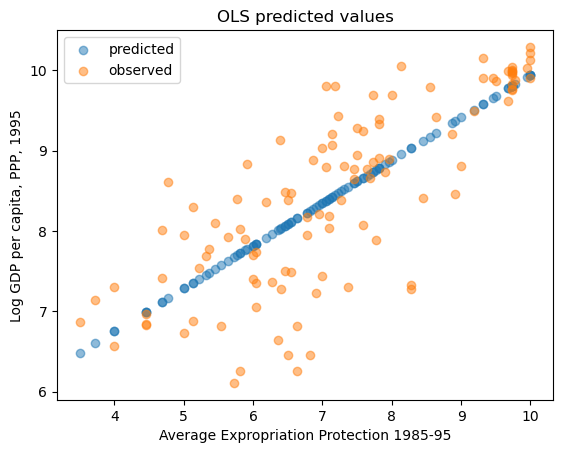

In [23]:
# Drop missing observations from whole sample
df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values. alpha is a blending value between 0 (transparent) and 1 (opaque)
plt.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5, label='predicted')

# Plot observed values
plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')

plt.legend()
plt.title('OLS predicted values')
plt.xlabel('Average Expropriation Protection 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.show()

```{figure} ../../../images/basic_empirics/basic_empirics/AcemogluEtAl_predvals.png
:height: 500px
:name: FigBasicEmpir_AcemPredVals

OLS predicted values for Acemoglu, et al, 2001 data
```


(SecBasicEmpLinRegExt)=
## Basic extensions of linear regression

* Instrumental variables (omitted variable bias)
* Logistic regression
* Multiple equation models
* Panel data
* Time series data
* Vector autoregression


(SecBasicEmpirExercises)=
## Exercises

```{exercise-start} Multiple linear regression
:label: ExerBasicEmpir_MultLinRegress
:class: green
```
For this problem, you will use the 397 observations from the [`Auto.csv`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/basic_empirics/Auto.csv) dataset in the [`/data/basic_empirics/`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/basic_empirics) folder of the repository for this book.[^Auto] This dataset includes 397 observations on the following variables:
* `mpg`: miles per gallon
* `cylinders`: number of cylinders
* `displacement`: engine displacement (cubic inches)
* `horsepower`: engine horsepower
* `weight`: vehicle weight (lbs.)
* `acceleration`: time to accelerate from 0 to 60 mph (sec.)
* `year`: vehicle year
* `origin`: origin of car (1=American, 2=European, 3=Japanese)
* `name`: vehicle name
1. Import the data using the [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function. Look for characters that seem out of place that might indicate missing values. Replace them with missing values using the `na_values=...` option.
2. Create descriptive statistics for each of the numerical variables (count, mean, standard deviation, min, 25%, 50%, 75%, max). How do you interpret the descriptive statistics on the `origin` variable? What might be a better way to report descriptive statistics for this categorical variable?
3. Produce a scatterplot matrix which includes all of the numerical variables `mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `year`, `origin`. Call your DataFrame of numerical variables `df_numer`. [Use the pandas scatterplot function in the code block below.]
```python
from pandas.plotting import scatter_matrix

scatter_matrix(df_numer, alpha=0.3, figsize=(6, 6), diagonal='kde')
```
4. Compute the correlation matrix for the numerical variables ($8\times 8$) using the [`pandas.DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method.
5. What is wrong with estimating the following linear regression model? How would you fix this problem? (Hint: There is an issue with one of the variables.)
    \begin{equation*}
      \begin{split}
        mpg_i &= \beta_0 + \beta_1 cylinders_i + \beta_2 displacement_i + \beta_3 horsepower_i + ... \\
        &\qquad \beta_4 weight_i + \beta_5 acceleration_i + \beta_6 year_i + \beta_7 origin_i + u_i
      \end{split}
    \end{equation*}
6. Estimate the following multiple linear regression model of $mpg_i$ on all other numerical variables, where $u_i$ is an error term for each observation, using Python's `statsmodels.api.OLS()` function, with indicator variables created for two out of the three `origin` categories (2=European, 3=Japanese).
    \begin{equation*}
      \begin{split}
        mpg_i &= \beta_0 + \beta_1 cylinders_i + \beta_2 displacement_i + \beta_3 horsepower_i + ... \\
        &\qquad \beta_4 weight_i + \beta_5 acceleration_i + \beta_6 year_i + ...\\
        &\qquad \beta_7 european_i + \beta_8 japanese_i + u_i
      \end{split}
    \end{equation*}
    * Which of the coefficients is statistically significant at the 1\% level?
    * Which of the coefficients is NOT statistically significant at the 10\% level?
    * Give an interpretation in words of the estimated coefficient $\hat{\beta}_6$ on $year_i$ using the estimated value of $\hat{\beta}_6$.
7. Looking at your scatterplot matrix from part (2), what are the three variables that look most likely to have a nonlinear relationship with $mpg_i$?
    * Estimate a new multiple regression model by OLS in which you include squared terms on the three variables you identified as having a nonlinear relationship to $mpg_i$ as well as a squared term on $acceleration_i$.
    * Report your adjusted R-squared statistic. Is it better or worse than the adjusted R-squared from part (4)?
    * What happened to the statistical significance of the $displacement_i$ variable coefficient and the coefficient on its squared term?
    * What happened to the statistical significance of the cylinders variable?
8. Using the regression model from part (6) and the `.predict()` function, what would be the predicted miles per gallon $mpg$ of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1 (American)?
```{exercise-end}
```


(SecBasicEmpirFootnotes)=
## Footnotes

The footnotes from this chapter.

[^PandasRef]: For a tutorial on using Python's Pandas package, see the {ref}`Chap_Pandas` chapter of this online book.

[^Auto]: The [`Auto.csv`](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/basic_empirics/Auto.csv) dataset comes from {cite}`JamesEtAl:2017` (ch. 3) and is also available at http://www-bcf.usc.edu/~gareth/ISL/data.html.